# Project_CEOSalary
#### ■ 데이터 준비 : 정상적인 데이터와 결측치가 존재하는 데이터로 준비
#### ■ 진행작업
#### -- DATAFRAME으로 데이터 로드 및 데이터 확인
#### -- 범주형 자료 빈도수 확인 및 그래프로 표현
#### -- 연속형 자료의 형태 파악
#### -- 이상치를 박스플롯으로 확인 및 제거/변환
#### -- 결측치 확인 및 제거 / 대체(fillna 함수 이용)

# [라이브러리 준비]

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# [Ex_CEOSalary.csv] 이용 데이터 분석 및 이상치 처리

## 1. 데이터 준비(데이터 로딩)

In [44]:
# Load data

df = pd.read_csv("Ex_CEOSalary.csv", encoding = "utf-8");
df.info

<bound method DataFrame.info of      salary         sales   roe  industry
0      1095  27595.000000  14.1         1
1      1001   9958.000000  10.9         1
2      1122   6125.899902  23.5         1
3       578  16246.000000   5.9         1
4      1368  21783.199219  13.8         1
..      ...           ...   ...       ...
204     930   1509.099976   9.0         4
205     525   1097.099976  15.5         4
206     658   4542.600098  12.1         4
207     555   2023.000000  13.7         4
208     626   1442.500000  14.4         4

[209 rows x 4 columns]>

## 2. 데이터 확인

### 2.1. DATAFRAME 정보 확인

In [45]:
df.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


### 2.2. 범주별 DATA 확인

### 2.2.1. 범주별 빈도수 확인

In [46]:
df['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

### 2.2.2. 범주형의 빈도수 그래프로 확인

<AxesSubplot:>

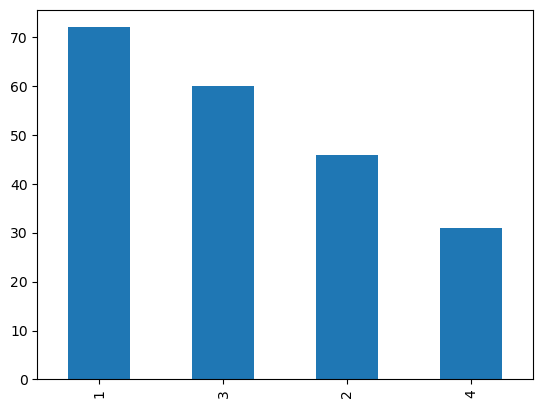

In [47]:
df['industry'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='industry'>

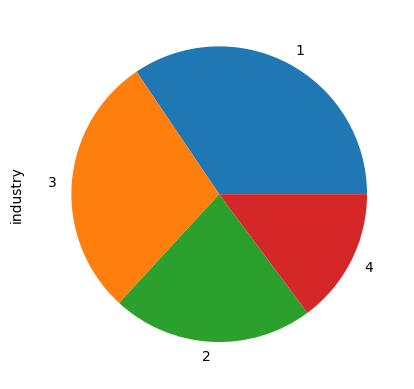

In [48]:
df['industry'].value_counts().plot(kind='pie')

In [49]:
# 범주형의 경우 막대 그래프, 파이 그래프 등을 사용하면 빈도수를 쉽게 비교할 수 있음을 확인함.

### 2.3. 연속형 DATA 확인

### 2.3.1. 연속형 자료형의 요약통계량 확인

In [50]:
df.describe()

,salary,sales,roe,industry
count,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211,2.239234
std,1372.345308,10633.271088,8.518509,1.083172
min,223.000000,175.199997,0.500000,1.000000
25%,736.000000,2210.300049,12.400000,1.000000
50%,1039.000000,3705.199951,15.500000,2.000000
75%,1407.000000,7177.000000,20.000000,3.000000
max,14822.000000,97649.898438,56.299999,4.000000


### 2.3.2.연속형 자료형의 분포를 확인_왜도

In [51]:
df.skew()

salary      6.904577
sales       5.035336
roe         1.572126
industry    0.221505
dtype: float64

### 2.3.3.연속형 자료형의 분포를 확인_첨도

In [52]:
df.kurtosis()

salary      58.971229
sales       33.115193
roe          3.797366
industry    -1.289426
dtype: float64

### 2.3.4.연속형 자료의 형태 파악_히스토그램

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

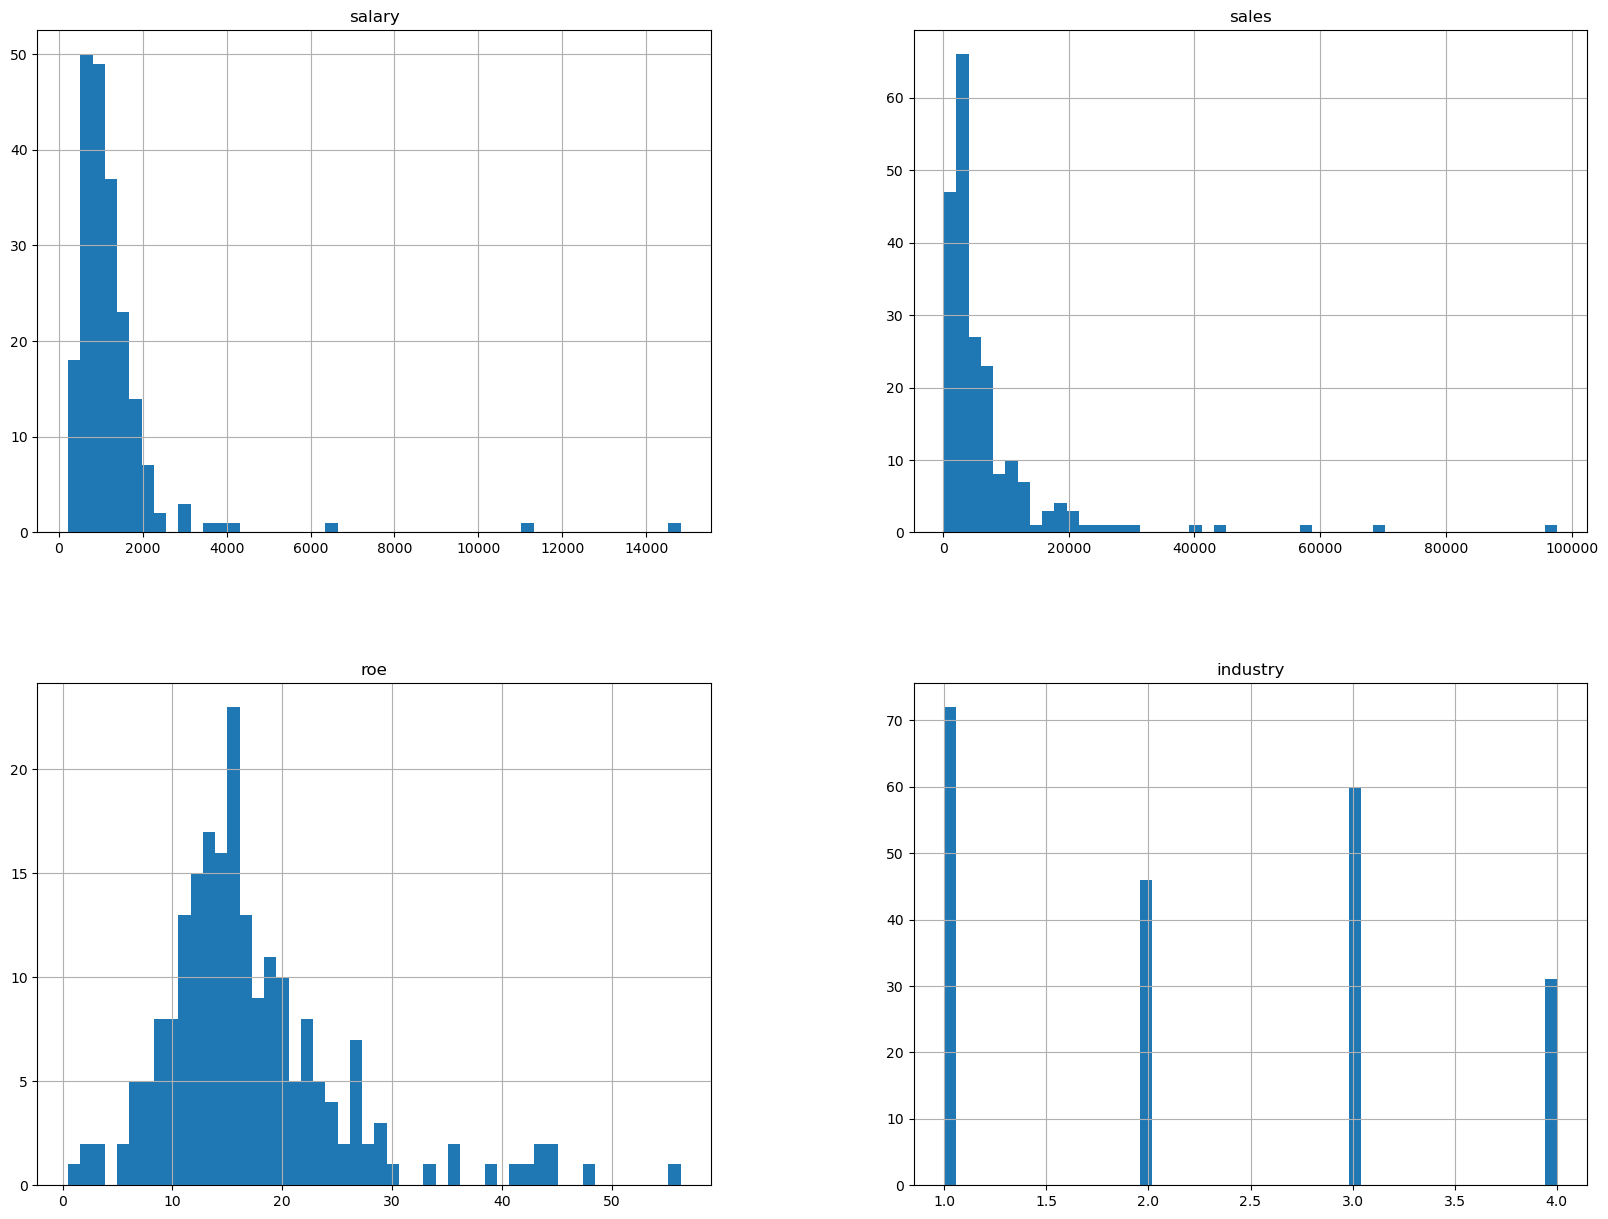

In [53]:
df.hist(bins=50, figsize=(20, 15)) 
# bins : 구간너비 / figsize : 도표 크기

In [54]:
df.info()

# Age, Cabin, Embarked는 결측값이 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


## 3. 이변량 데이터 탐색

### 3.1. 변수간의 상관관계 파악

In [55]:
df.corr()
# method 파라미터로 pearson, spearman, kendall 지정 가능 (pearson이 default)

,salary,sales,roe,industry
salary,1.000000,0.119869,0.114842,-0.015725
sales,0.119869,1.000000,-0.055386,-0.100284
roe,0.114842,-0.055386,1.000000,-0.011833
industry,-0.015725,-0.100284,-0.011833,1.000000


### 3.2. 산점도를 이용하여 상관관계 파악

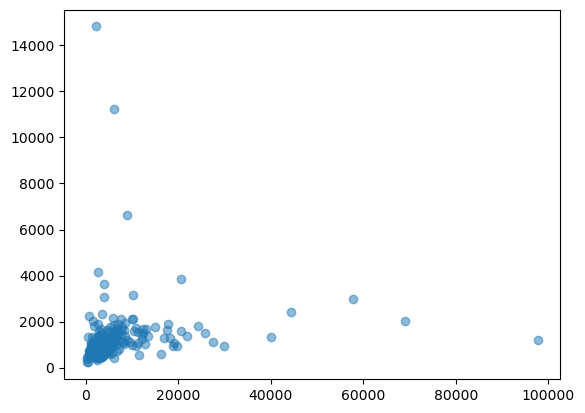

In [56]:
plt.scatter(df['sales'], df['salary'], alpha=0.5)
plt.show()

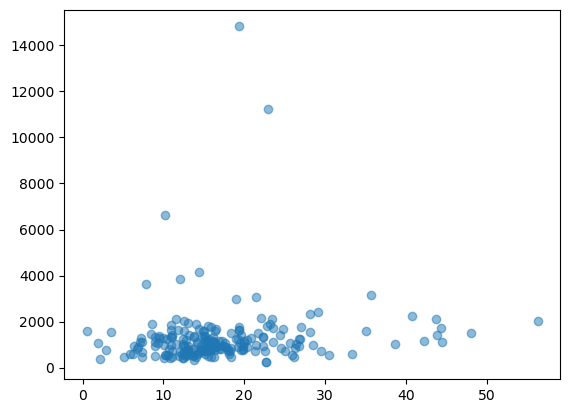

In [57]:
plt.scatter(df['roe'], df['salary'], alpha=0.5)
plt.show()

### 3.3. Groupby 함수를 이용하여 두 변수를 하나의 그룹으로 묶어 확인하기

In [15]:
df.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
1          72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   
2          46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
3          60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
4          31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   

                   
              max  
industry           
1          3844.0  
2          6640.0  
3         14822.0  
4          1100.0

## 4. 이상치 처리

### 4.1. 이상치 확인을 위해 상자수염분포도 사용

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000295F33A2D90>, <matplotlib.lines.Line2D object at 0x00000295F33B70A0>], 'caps': [<matplotlib.lines.Line2D object at 0x00000295F33B7370>, <matplotlib.lines.Line2D object at 0x00000295F33B7640>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000295F33A2AC0>], 'medians': [<matplotlib.lines.Line2D object at 0x00000295F33B7910>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000295F33B7BE0>], 'means': []})

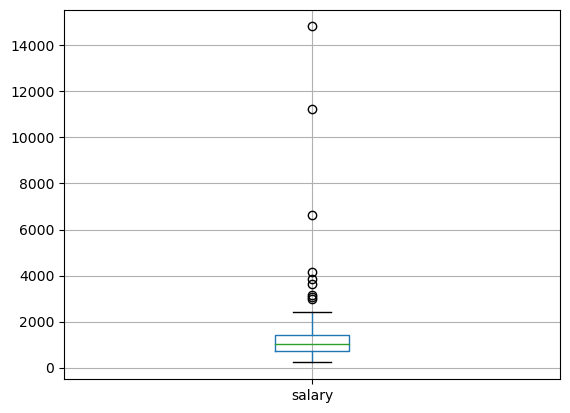

In [16]:
df.boxplot(column='salary', return_type='both')

### 4.2. 이상치 처리로 IRQ 방식 사용

<AxesSubplot:>

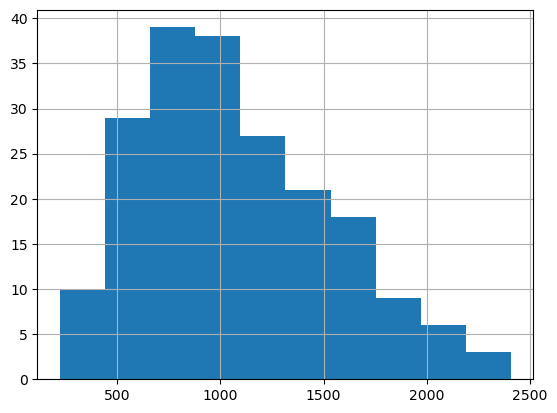

In [17]:
Q1_sal = df['salary'].quantile(q=0.25)
Q3_sal = df['salary'].quantile(q=0.75)
IQR_sal = Q3_sal - Q1_sal

df_IQR = df[(df['salary'] < Q3_sal+IQR_sal*1.5) &
            (df['salary'] > Q1_sal-IQR_sal*1.5)]
df_IQR['salary'].hist()

### 4.3. 이상치 제거 후 선형관계 재파악 및 개선내용 확인

In [18]:
df_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.335446,0.289704,-0.202648
sales,0.335446,1.000000,-0.065034,-0.069790
roe,0.289704,-0.065034,1.000000,-0.024423
industry,-0.202648,-0.069790,-0.024423,1.000000


In [19]:
# 위에서는 이상치 제거방법에 의해서이며, 아래에서는 이상치 변환 방법 사용

### 4.4. 이상치 변환

### 4.4.1. 이상치 변환_로그변환

In [20]:
df['log_salary'] = np.log(df['salary'])
df['log_sale'] = np.log(df['sales'])
df['log_roe'] = np.log(df['roe'])

df.corr()

,salary,sales,roe,industry,log_salary,log_sale,log_roe
salary,1.000000,0.119869,0.114842,-0.015725,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,-0.100284,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,-0.011833,0.208499,-0.122553,0.873419
industry,-0.015725,-0.100284,-0.011833,1.000000,-0.173583,-0.118576,-0.051647
log_salary,0.794208,0.281286,0.208499,-0.173583,1.000000,0.459148,0.163548
log_sale,0.194092,0.742921,-0.122553,-0.118576,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,-0.051647,0.163548,-0.120642,1.000000


### 4.4.2. 이상치변환_제곱근변환

In [21]:
df['sqrt_salary'] = np.sqrt(df['salary'])
df['sqrt_sale'] = np.sqrt(df['sales'])
df['sqrt_roe'] = np.sqrt(df['roe'])

df.corr()

,salary,sales,roe,industry,log_salary,log_sale,log_roe,sqrt_salary,sqrt_sale,sqrt_roe
salary,1.000000,0.119869,0.114842,-0.015725,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,-0.100284,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,-0.011833,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
industry,-0.015725,-0.100284,-0.011833,1.000000,-0.173583,-0.118576,-0.051647,-0.094616,-0.125441,-0.036050
log_salary,0.794208,0.281286,0.208499,-0.173583,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sale,0.194092,0.742921,-0.122553,-0.118576,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,-0.051647,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,-0.094616,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sale,0.164340,0.936282,-0.087687,-0.125441,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,-0.036050,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


In [22]:
# 위와 같은 방식으로 이상치를 제거하지 않고, 변환을 함으로써 전체 데이터에 대한 이상치의 영향력을 줄일 수 있다.
# 다만 이 방식은 이상치를 제거하는 방식보다 현실적인 활동도에 제약이 많다.

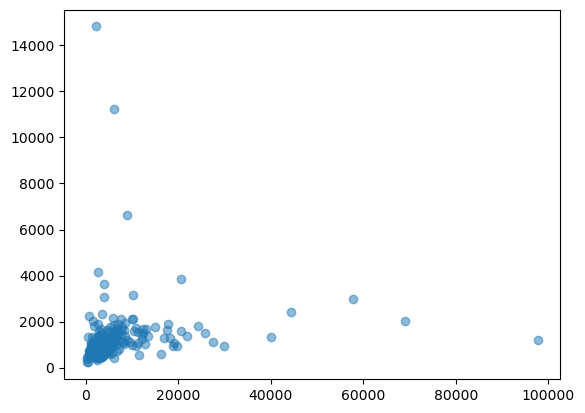

In [24]:
plt.scatter(df['sales'], df['salary'], alpha=0.5)
plt.show()

# [Ex_Missing.csv] 이용 데이터 분석 및 결측치 처리

## 1. 데이터 준비(데이터 로딩)

In [25]:
# Load data

df = pd.read_csv("Ex_Missing.csv", encoding = "utf-8");
df.info

<bound method DataFrame.info of    salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1     NaN   9958.000000  10.900000         1
2     NaN   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0           NaN  13.800000         1
5  1145.0           NaN  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000        NaN         2>

## 2. 데이터 확인

## 2.1. DATAFRAME 정보 확인

In [26]:
df.head()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.1,1
1,NaN,9958.000000,10.9,1
2,NaN,6125.899902,23.5,1
3,578.0,16246.000000,5.9,1
4,1368.0,NaN,13.8,1


## 2.2. 결측치 있는 칼럼 확인

In [27]:
df.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

## 2.3. 결측치 있는 행 단위 확인

In [28]:
df.isnull().sum(1)
# 행의 경우 sum() 함수에 파라미터로 1을 입력한다

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

## 2.4. 결측치 제거_행 제거

In [29]:
# 결측치 제거전 
df['missing'] = df.isnull().sum(1)
df.head(10)

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [30]:
df_del_col = df.dropna(axis=1)
df_del_col.head(10)
# 열을 제거하는 방법은 axis=1을 파라미터로 부여함

,industry,missing
0,1,0
1,1,1
2,1,1
3,1,0
4,1,1
5,2,1
6,2,0
7,2,0
8,2,0
9,2,1


In [31]:
df_del_col = df[['salary']].dropna(axis=0)
df_del_col.head()
# 특정 행/열을 제거할 때 [[]] 해당 칼럼명을 입력하여 제거

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0


## 3. 결측치 변환

### 3.1. 결측치를 특정값으로 대체

In [32]:
df_fill_zero = df.fillna(0)
df_fill_zero.isnull().sum()

salary      0
sales       0
roe         0
industry    0
missing     0
dtype: int64

### 3.2. 결측치를 바로 앞의 값으로 대체

In [33]:
df_fill_before = df.fillna(method='ffill')
df_fill_before.head(10)

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1095.0,9958.000000,10.900000,1,1
2,1095.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,16246.000000,13.800000,1,1
5,1145.0,16246.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,10.500000,2,1


### 3.3. 결측치를 바로 뒤의 값으로 대체

In [34]:
df_fill_after = df.fillna(method='bfill')
df_fill_after.head(10)

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,578.0,9958.000000,10.900000,1,1
2,578.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,2266.699951,13.800000,1,1
5,1145.0,2266.699951,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


### 3.4. 결측치를 평균값으로 대체

In [35]:
df_fill_mean = df.fillna(df.mean())
df_fill_mean.head(10)

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1053.5,9958.000000,10.900000,1,1
2,1053.5,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,9069.825012,13.800000,1,1
5,1145.0,9069.825012,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,14.600000,2,1


### 3.5. 자신의 변수가 아닌 특정 칼럼의 평균 등으로 모든 결측치를 변환

In [36]:
df_fill_mean_sal = df.fillna(df.mean()['salary'])
df_fill_mean_sal.head(10)

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1053.5,9958.000000,10.900000,1,1
2,1053.5,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,1053.500000,13.800000,1,1
5,1145.0,1053.500000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,1053.500000,2,1


### 3.6. 결측치를 집단 평균값으로 대체

In [37]:
fill_mean_func = lambda g : g.fillna(g.mean())
df_group_mean = df.groupby('industry').apply(fill_mean_func)

df_group_mean.head()

,salary,sales,roe,industry,missing
0,1095.000000,27595.000000,14.1,1,0
1,1013.666667,9958.000000,10.9,1,1
2,1013.666667,6125.899902,23.5,1,1
3,578.000000,16246.000000,5.9,1,0
4,1368.000000,14981.224975,13.8,1,1


### 3.7. 결측치를 분석자가 자체적으로 설정한 값으로 대체할 경우

In [38]:
fill_values = {1:1000, 2:2000}
fill_func = lambda d : d.fillna(fill_values[d.name])

df_group_custom = df.groupby('industry').apply(fill_func)
df_group_custom.head(10)
# 코드는 산업을 기준으로 1은 1000, 2는 2000으로 결측치를 대체한다는 것임

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,1000.0,9958.000000,10.900000,1,1
2,1000.0,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,1000.000000,13.800000,1,1
5,1145.0,2000.000000,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,2000.000000,2,1


### 3.8. 각 칼람별로 별도의 방법으로 적용하는 경우

In [39]:
missing_fill_val = {'salary' : df.salary.interpolate(),
                    'sales' : df.sales.mean(),
                    'roe' : 'missing'
                    }
df_multi = df.fillna(missing_fill_val)
df_multi.head()

,salary,sales,roe,industry,missing
0,1095.000000,27595.000000,14.1,1,0
1,922.666667,9958.000000,10.9,1,1
2,750.333333,6125.899902,23.5,1,1
3,578.000000,16246.000000,5.9,1,0
4,1368.000000,9069.825012,13.8,1,1


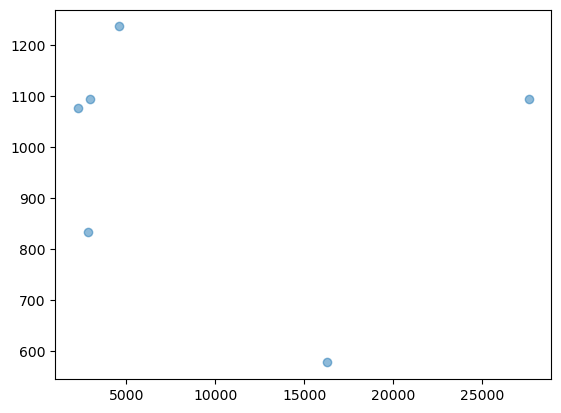

In [40]:
plt.scatter(df['sales'], df['salary'], alpha=0.5)
plt.show()